# Set up

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# Getting data

In [2]:
with open('../csvs/top_50_weekly_data.json') as f:
    top_data = json.load(f)

In [3]:
top_df = pd.DataFrame([i['entry_history'] for i in top_data])
top_df.head()

,bank,entry,event,event_transfers,event_transfers_cost,id,movement,overall_rank,points,points_on_bench,rank,rank_sort,targets,total_points,value
0,0,107827,1,0,0,107827,new,405969,75,14,405969,407825,None,75,1000
1,0,107827,2,1,0,4664139,new,80980,99,1,66206,66330,None,174,1004
2,5,107827,3,1,0,9773353,new,116116,46,5,3347696,3348830,None,220,1011
3,18,107827,4,2,4,15147223,new,55041,65,17,220533,220740,None,281,1017
4,18,107827,5,0,0,20652163,new,2687,98,11,11172,11215,None,379,1023


In [4]:
top_entry = top_df[(top_df['event'] == 38)
                   & (top_df['overall_rank'] == 1)]['entry'].iloc[0]

In [5]:
top_df_test = top_df.copy()
top_df_test = top_df_test[top_df_test['event'] > 20]

In [22]:
top_df_test_overall = top_df_test.groupby('entry')['points'].sum()

In [8]:
entry_df = pd.DataFrame([i['event'] for i in top_data[20:38]])

# Benchmarking

In [9]:
# mean points of top 50 managers

top_df_test_overall.mean()

1242.54

In [10]:
# best points of top 50 managers

top_df_test_overall.max()

1347

In [11]:
# best points of top 50 managers

top_df_test_overall.min()

1162

In [12]:
# average points of all managers

entry_df['average_entry_score'].sum()

920

In [ ]:
top_test_ranking = \
top_df_test_overall.sort_values(ascending=False).reset_index()

top_test_ranking['rank'] = top_test_ranking.index + 1
top_test_ranking[['rank', 'points']]

In [62]:
df = top_test_ranking.copy()
y = df['points'].values
df['intercept'] = 1
X = df[['intercept', 'rank']].values
b = np.linalg.inv(X.T @ X) @ X.T @ y

def calculate_approximate_ranking(points):
    return (points - b[0])/b[1]

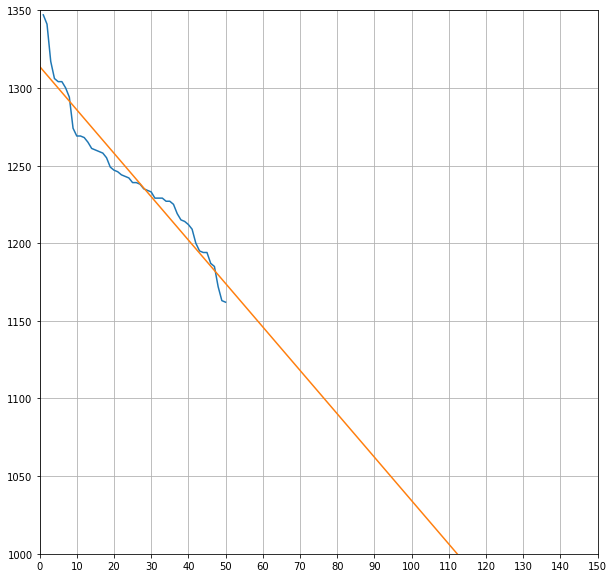

In [68]:
top_test_ranking = \
top_df_test_overall.sort_values(ascending=False).reset_index()

top_test_ranking['rank'] = top_test_ranking.index + 1
top_test_ranking[['rank', 'points']]

plt.figure(figsize=(10, 10))
plt.plot(top_test_ranking['rank'], top_test_ranking['points'])
plt.plot([calculate_approximate_ranking(i) for i in np.linspace(1000, 1350, 100)], np.linspace(1000, 1350, 100))
plt.axes().xaxis.set_major_locator(MultipleLocator(10))
plt.grid(which='major')
plt.xlim(0, 150)
plt.ylim(1000, 1350)
plt.show()

In [71]:
top_test_ranking[['rank', 'points']]

,rank,points
0,1,1347
1,2,1341
2,3,1317
3,4,1306
4,5,1304
5,6,1304
6,7,1300
7,8,1294
8,9,1274
9,10,1269


In [69]:
# average budget of top 50 managers

top_df_test.groupby('entry')['value'].mean().mean()

1057.7522222222224